# Project: Wrangling and Analyze Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import requests

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [4]:
df = pd.read_csv('E:\\project-term2\\twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [5]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv" 

# Send a GET request to the URL
response = requests.get(url)

if response.status_code == 200:
    # Save the content of the response to a local file
    with open('image_predictions.tsv', 'wb') as file:
        file.write(response.content)
    print("Image predictions file downloaded successfully.")
else:
    print(f"Failed to download the file. Status code: {response.status_code}")

Image predictions file downloaded successfully.


In [6]:
# Load the image predictions into a pandas DataFrame
pred = pd.read_csv('image_predictions.tsv', sep='\t')
pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [7]:
pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [8]:
tweets_info_data = []

# Read the tweet_json.txt file line by line

with open('tweet_json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        
        tweets_info_data.append({
            'tweet_id': tweet_id,
            'retweet_count': retweet_count,
            'favorite_count': favorite_count
        })

# Create a DataFrame from the list of tweet data
tweet_info = pd.DataFrame(tweets_info_data)

# Display the first few rows of the DataFrame
tweet_info.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [9]:
tweet_info

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



# visual assesment

In [10]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

In [12]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


# Programmatic Assessment:


In [13]:
df.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                           745
doggo                         2259
floofer                       2346
pupper                        2099
puppo                         2326
dtype: int64

In [15]:
print(df.dtypes)

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object


# Visualizing the Data:

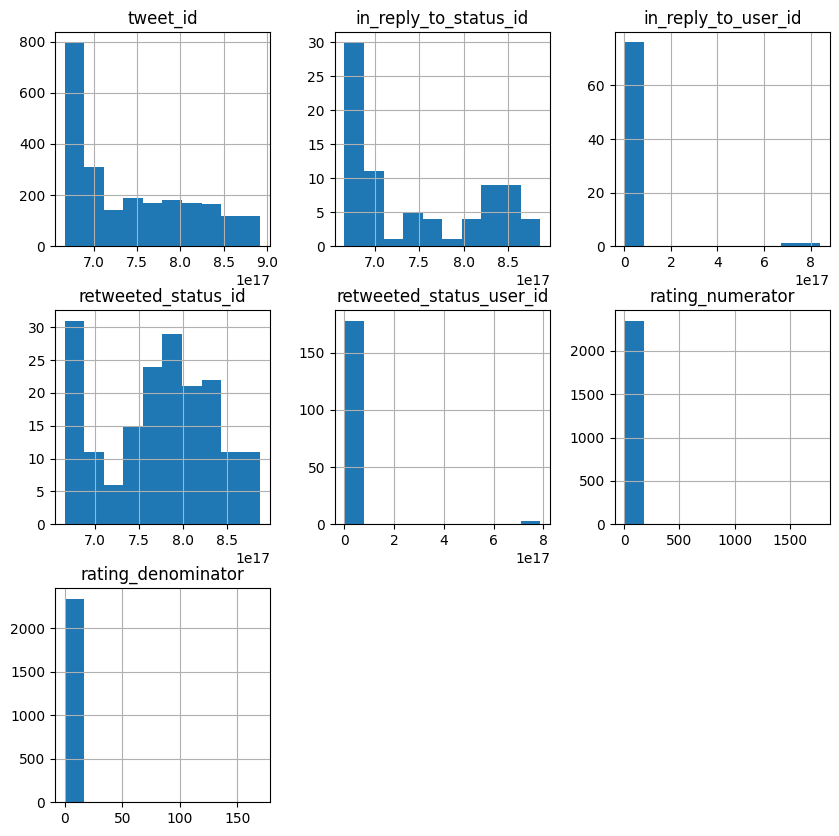

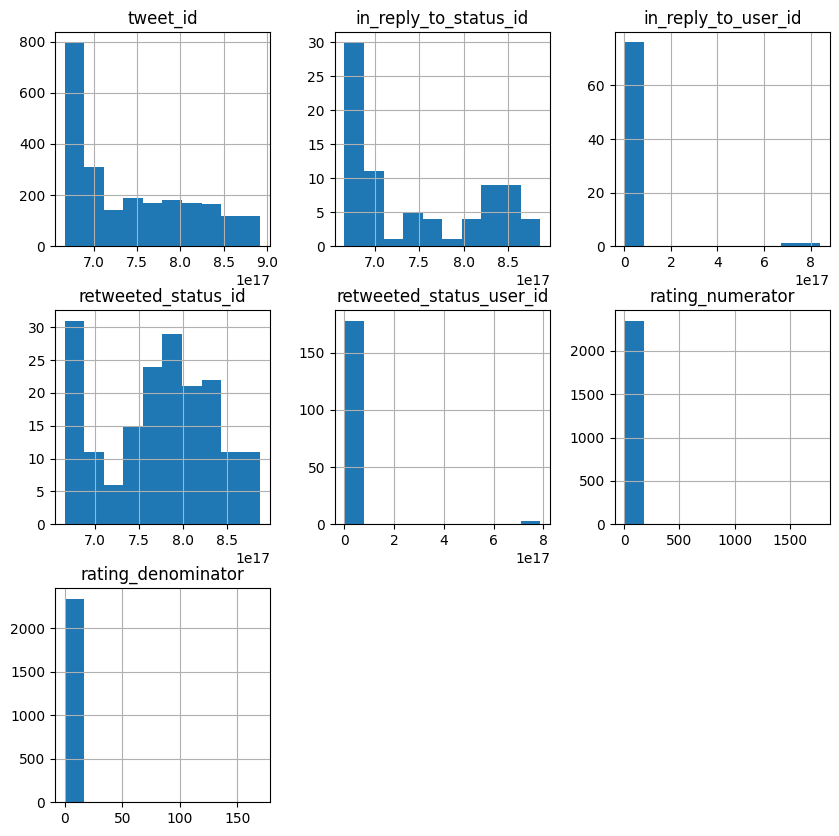

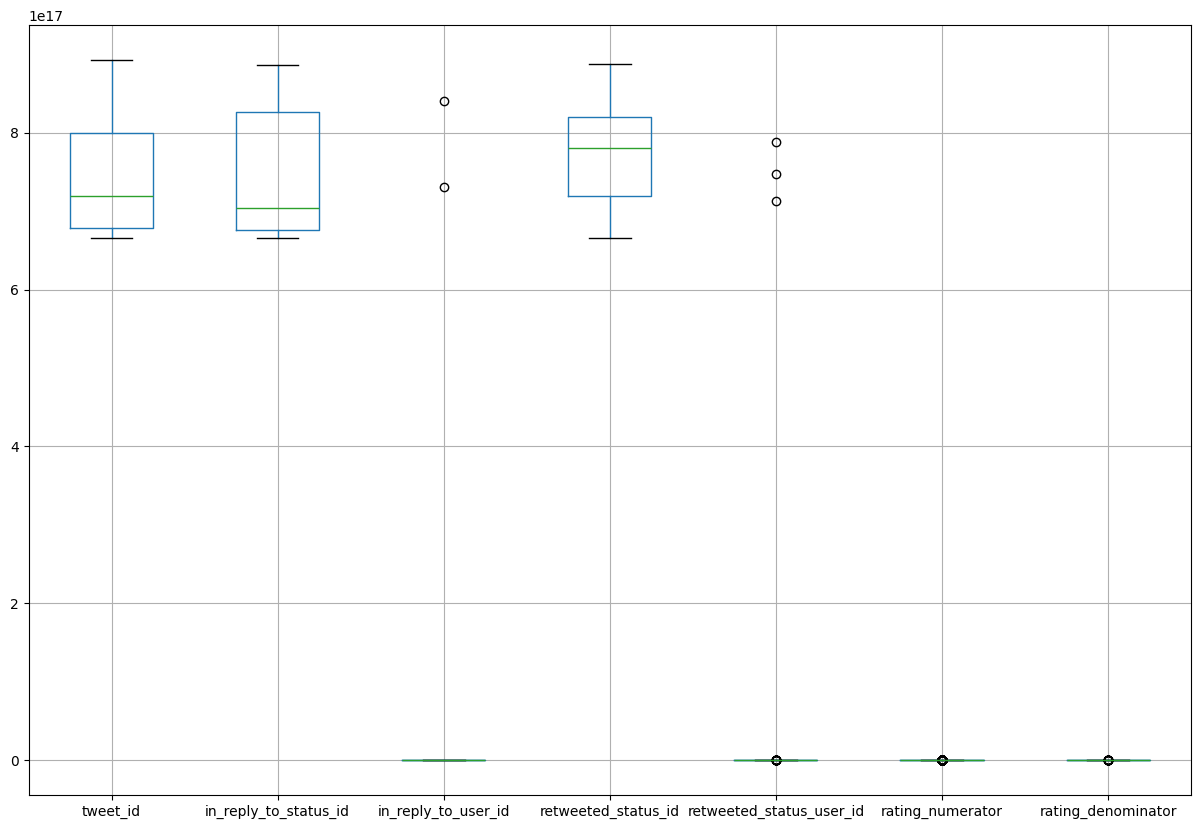

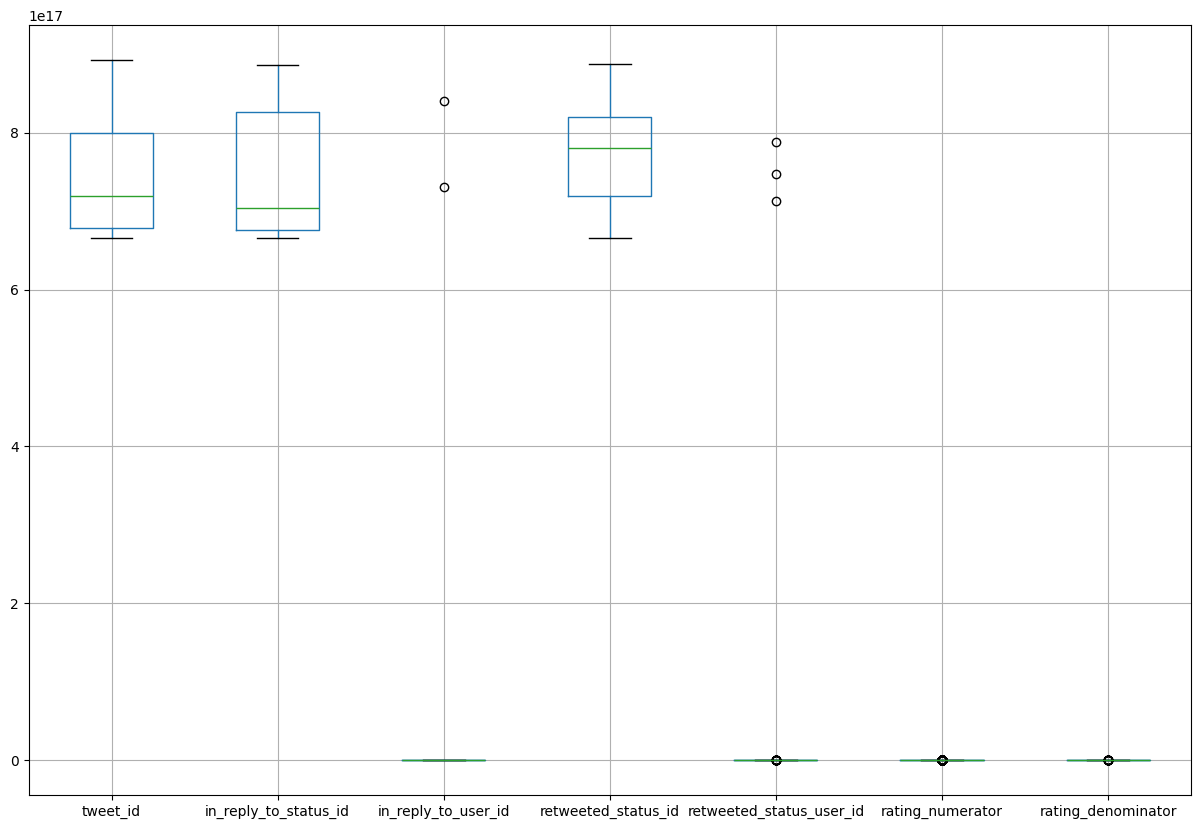

In [18]:
df.hist(figsize=(10, 10))
plt.show()

df.hist(figsize=(10, 10))
plt.show()

# Box plots for identifying outliers
df.boxplot(figsize=(15, 10))
plt.show()

df.boxplot(figsize=(15, 10))
plt.show()

### Quality issues
1. Missing values in in_reply_to_status_id and in_reply_to_user_id.
2. Missing values in retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp.
3. Incorrect data types (e.g., tweet_id should be a string).
4. Some tweets do not include dog ratings.
5. Inconsistent dog names (e.g., some names are "a", "an", or "the").
6. Some tweets are retweets (we only need original ratings).
7. Some tweets lack images.
8. Inconsistent date formats in the timestamp column.
9. Incorrect data types (e.g., timestamp should be in datetime format).
10. Inconsistent text formats (e.g., capitalization or spacing in names or text).
11. Invalid entries in rating_numerator and rating_denominator.
12. Duplicate entries in the datasets.
13. Missing data in expanded_urls.
14. Truncated text fields in the text column.
15. Inaccurate dog stages (e.g., doggo, floofer, pupper, puppo).
16. Non-descriptive column names.

### Tidiness issues
1. Dog Stage in Multiple Columns

2. Multiple URLs in expanded_urls Column

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [ ]:
# Make copies of original pieces of data
df_original = df.copy()

# Test
print("Copy of twitter-archive-enhanced DataFrame created.")
print(df_original.info())


Copy of twitter-archive-enhanced DataFrame created.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-n

In [ ]:
# Make a copy of the original image_predictions DataFrame
pred_original = pred.copy()

# Test
print("Copy of image_predictions DataFrame created.")
print(pred_original.info())

Copy of image_predictions DataFrame created.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB
None


In [ ]:
# Make a copy of the original tweet_json DataFrame
tweet_info_original = tweet_info.copy()

# Test
print("Copy of tweet_json DataFrame created.")
print(tweet_info_original.info())


Copy of tweet_json DataFrame created.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB
None


### Issue #1: i want oeiginal ratings only 


#### Define: filter retweets

#### Code


In [ ]:
df = df[df['retweeted_status_id'].isnull()]

#### Test

In [ ]:
print(df['retweeted_status_id'].notnull().sum())

0


### Issue #2: missing values in status_id column & reply_id column 

#### Define: drop unnessesarry columns  

#### Code

In [ ]:
# Drop columns 'in_reply_to_status_id' and 'in_reply_to_user_id'
df = df.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id'])


#### Test

In [ ]:
print("Columns after dropping 'in_reply_to_status_id' and 'in_reply_to_user_id':")
print(df.columns)

Columns after dropping 'in_reply_to_status_id' and 'in_reply_to_user_id':
Index(['tweet_id', 'timestamp', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')


### Issue #3: some Missing values in retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp

#### Define: Drop the columns that we won't need in our analysis

#### Code

In [ ]:
# Drop the columns we don't need
df = df.drop(columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'])


#### Test

In [ ]:
print("Columns after dropping 'retweeted_status_id', 'retweeted_status_user_id', and 'retweeted_status_timestamp':")
print(df.columns)


Columns after dropping 'retweeted_status_id', 'retweeted_status_user_id', and 'retweeted_status_timestamp':
Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')


### Issue #4: Erroneous data types (e.g., tweet_id should be a string)


### Define: Convert them into str 

### Code


In [ ]:
# Convert tweet_id to string in all DataFrames
df['tweet_id'] = df['tweet_id'].astype(str)
pred['tweet_id'] = pred['tweet_id'].astype(str)
tweet_info['tweet_id'] = tweet_info['tweet_id'].astype(str)

### Test

In [ ]:
print(df['tweet_id'].dtype)
print(pred['tweet_id'].dtype)
print(tweet_info['tweet_id'].dtype)

object
object
object


### Issue #5: Some tweets do not contain dog ratings 

### Define: Filter the tweets that don't contain dog ratings.

### Code


In [ ]:
df = df[df['text'].str.contains(r'(\d+\.\d+/10|\d+/10)')]

C:\Users\mmr25\AppData\Local\Temp\ipykernel_8884\3769004283.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df = df[df['text'].str.contains(r'(\d+\.\d+/10|\d+/10)')]


### Test

In [ ]:
print(df[df['text'].str.contains(r'(\d+\.\d+/10|\d+/10)')].shape)

(2159, 12)


C:\Users\mmr25\AppData\Local\Temp\ipykernel_8884\3555592760.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  print(df[df['text'].str.contains(r'(\d+\.\d+/10|\d+/10)')].shape)


### Issue #6: Inconsistent dog names (e.g., some names are "a", "an", or "the")

### Define: Standardize dog names.

### Code

In [ ]:
# Replace invalid dog names
invalid_dog_names = ['a', 'an', 'the']
df['name'] = df['name'].apply(lambda x: None if x in invalid_dog_names else x)

### Test

In [ ]:
print(df['name'].value_counts())

name
Charlie       11
Lucy          11
Oliver        10
Cooper        10
Tucker         9
              ..
Wishes         1
Rose           1
Theo           1
Fido           1
Christoper     1
Name: count, Length: 951, dtype: int64


### Issue #7: Some tweets do not contain images

### Define: Filter tweets that have images.

### Code 

In [ ]:
# Filter tweets that have images
df = df[df['expanded_urls'].notnull()]

### Test

In [ ]:
print(df['expanded_urls'].isnull().sum())

0


### Issue #8: Inconsistent date formats in timestamp

### Define: Convert timestamp to datetime.

### Code

In [ ]:
# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

### Test


In [ ]:
print(df['timestamp'].dtype)

datetime64[ns, UTC]


# Tidiness Issues

### Issue 1#: Dog stages (doggo, floofer, pupper, puppo) should be in a single column

### Define: Melt the dog stages into a single column.

### Code

In [ ]:
# Combine dog stages into a single column
df['dog_stage'] = df[['doggo', 'floofer', 'pupper', 'puppo']].apply(lambda x: ','.join(x.dropna()), axis=1)
df['dog_stage'] = df['dog_stage'].str.replace('None,', '').str.replace(',None', '').replace('', None)

### Test

In [ ]:
print(df['dog_stage'].value_counts())

dog_stage
pupper           222
doggo             72
puppo             23
doggo,pupper      10
floofer            9
doggo,puppo        1
doggo,floofer      1
Name: count, dtype: int64


### Issue 2#: The three datasets should be merged into one DataFrame for easier analysis

### Define: Merge df, pred, and tweet_info.

### Code

In [ ]:
# Merge df and pred on 'tweet_id'
df_merged = pd.merge(df, pred, on='tweet_id', how='left')

# Merge the resulting DataFrame with df3 on 'tweet_id'
df_merged = pd.merge(df_merged, tweet_info, on='tweet_id', how='left')

### Test 

In [ ]:
print(df_merged.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2104 entries, 0 to 2103
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2104 non-null   object             
 1   timestamp           2104 non-null   datetime64[ns, UTC]
 2   source              2104 non-null   object             
 3   text                2104 non-null   object             
 4   expanded_urls       2104 non-null   object             
 5   rating_numerator    2104 non-null   int64              
 6   rating_denominator  2104 non-null   int64              
 7   name                1424 non-null   object             
 8   doggo               84 non-null     object             
 9   floofer             10 non-null     object             
 10  pupper              232 non-null    object             
 11  puppo               24 non-null     object             
 12  dog_stage           338 non-null  

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [ ]:
# Save the cleaned and merged DataFrame to a CSV file named "twitter_archive_master.csv"
df_merged.to_csv('twitter_archive_master.csv', index=False)

# Test to ensure the file is saved correctly
import os

# Check if the file exists
file_exists = os.path.isfile('twitter_archive_master.csv')
print(f"File saved successfully: {file_exists}")


File saved successfully: True


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [ ]:
# Load the cleaned data
df_cleaned = pd.read_csv('twitter_archive_master.csv')

# Display the first few rows of the cleaned DataFrame
df_cleaned.head()


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048


### Insight 1#: Most Common Dog Names

In [ ]:
# Filter out invalid dog names
valid_dog_names = df_cleaned['name'].str.islower() == False
filtered_dog_names = df_cleaned[valid_dog_names]

# Get the most common dog names
common_dog_names = filtered_dog_names['name'].value_counts().head(10)
print("Most common dog names:")
print(common_dog_names)


Most common dog names:
name
Lucy       11
Charlie    11
Oliver     10
Cooper     10
Tucker      9
Penny       9
Winston     8
Sadie       8
Lola        8
Toby        7
Name: count, dtype: int64



The most common dog names in the dataset are as follows:
1. Lucy       11
1. Charlie    11
2. Oliver     10
3. Cooper     10
4. Tucker      9
5. Penny       9
6. Winston     8
7. Sadie       8
8. Lola        8
9. Toby        7


### Insight 2#: Relationship Between Retweet Count and Favorite Count

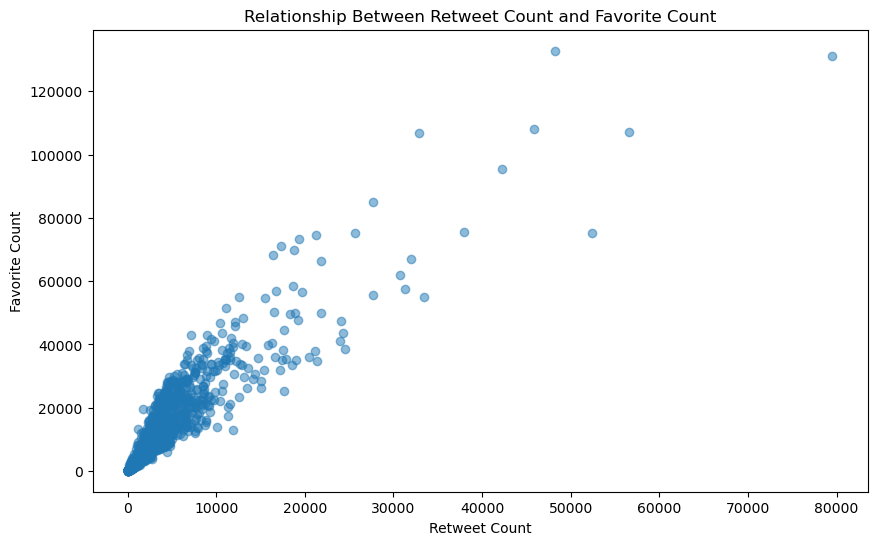

In [ ]:
# Scatter plot to visualize the relationship between retweet count and favorite count
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['retweet_count'], df_cleaned['favorite_count'], alpha=0.5)
plt.title('Relationship Between Retweet Count and Favorite Count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count')
plt.show()


### Insight 3#: Most Popular Source of Tweets

In [ ]:
# Most popular source of tweets
source_counts = df_cleaned['source'].value_counts()
print("Most popular source of tweets:")
print(source_counts)

Most popular source of tweets:
source
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1972
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       30
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: count, dtype: int64


insight 3 : The most popular sources of tweets are:

1. Twitter for iPhone
2. Vine - Make a Scene
3. Twitter Web Client
4. TweetDeck

### Visualization

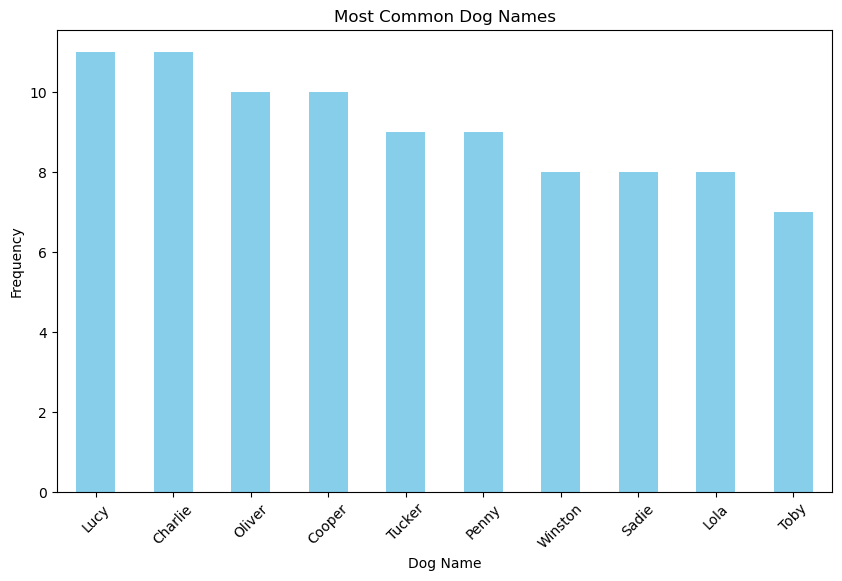

In [ ]:
# Filter out invalid dog names
valid_dog_names = df_cleaned['name'].str.islower() == False
filtered_dog_names = df_cleaned[valid_dog_names]

# Get the most common dog names
common_dog_names = filtered_dog_names['name'].value_counts().head(10)

# Bar chart of the most common dog names
plt.figure(figsize=(10, 6))
common_dog_names.plot(kind='bar', color='skyblue')
plt.title('Most Common Dog Names')
plt.xlabel('Dog Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()